# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [3]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [4]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [5]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [6]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [7]:
# # add subfolder that contains all the function implementations
# # to the system path so we can import them
# import sys
# sys.path.append('code/')

# # the actual implementation is in linear_regression.py,
# # here we will just use it to fit a model
# from linear_regression import *

def lsq(X, y):
    """
    Least squares linear regression
    :param X: Input data matrix
    :param y: Target vector
    :return: Estimated coefficient vector for the linear regression
    """

    # add column of ones for the intercept
    ones = np.ones((len(X), 1))
    X = np.concatenate((ones, X), axis=1)

    # calculate the coefficients
    beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

    return beta

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_lest = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

[[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]


In [8]:
#### Exercise 1: Linear Regression ####

# Obtain coefficients
beta = lsq(X_train, y_train)

predict = lambda X, beta: np.matmul(X, beta[1:]) + beta[0] # Lambda function for prediction

# Make predictions
y_pred = predict(X_test, beta)

# Get a mean squared error
mean_squared_error = lambda y, y_pred: np.mean((y - y_pred)**2)
mse_ex1 = mean_squared_error(y_test, y_pred)

# Print mean squared error
print(f"Mean Squared Error exercise 1: {mse_ex1}")


Mean Squared Error exercise 1: 2794.569014500727


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

### Derivation:

First we define the residual sum of squares of a weighted linear regression as:

$$
RSS = \sum_{i=1}^{n} ( y_{i} - X_{i} \beta )^{2}  d
$$

We can rewrite this as:
$$
RSS = ( Y - X \beta )^{T}D(Y-X \beta)
$$
Or:
$$
RSS = Y^T D Y - 2 Y^T D X \beta + \beta^T X^T D X \beta
$$
With D being a $n x n$ matrix that contains the weights of every sample on its diagonal.
To determine the least squares solution we take the derivative of this expression over $\beta$ and set this to zero. Within the expression, only $2 Y^T D X \beta + \beta^T X^T D X \beta$ is dependent on beta. Taking the derivative of this expression over $\beta$ yields:

$$
-2 X^T D Y + 2X^T D X \beta = 0
$$

This can be subsequently simplified as:

$$
X^T D X \beta = X^T W Y
$$

Which gives the final solution for $\beta$:
$$
\beta = (X^T D X)^{-1} X^T D Y
$$

### Code implementation:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


def lsq_wght(X_train, y_train):

    # Count the number of occurrences of each unique value
    unique_rows, inverse_indices = np.unique(X_train, axis=0, return_inverse=True)
    counts = Counter(inverse_indices)
    
    # Create weights based on counts
    d = np.array([counts[idx] for idx in inverse_indices])
    
    # Add a column of ones to include the intercept term
    X_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # (n x 2) matrix with intercept
    
    # Create the diagonal weight matrix W
    W = np.diag(d)
    
    # Step 4: Implement Weighted Linear Regression
    X_T_W = X_intercept.T @ W
    beta_weighted = np.linalg.inv(X_T_W @ X_intercept) @ (X_T_W @ y_train)

    return beta_weighted, d


beta_weighted, b = lsq_wght(X_train, y_train)
# Predict the target values for the test set
y_pred = X_test @ beta_weighted[1:]  # Matrix multiplication to get predictions
y_pred = y_pred + beta_weighted[0]   #add bias to all predictions
# Calculate Mean Square Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)

print('Mean squared error using weighted linaer regression:',mse)

Mean squared error using weighted linaer regression: 2794.5690145007297


### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

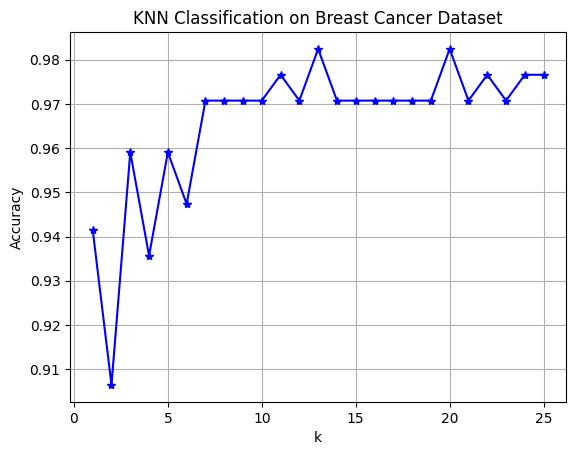

In [14]:
#### Exercise 3: k-NN classification ####
import matplotlib.pyplot as plt
import scipy

# Normalize X_train and X_test
normalize = lambda matrix: (matrix - np.min(matrix, axis=0)) / (np.max(matrix, axis=0) - np.min(matrix, axis=0)) # Lambda expression

# Get data from breast_cancer dataset & normalize
X = breast_cancer.data
X_norm = normalize(X)

# Get length of train and test sets
train_len = int(0.7 * len(X_norm))

# Split data
X_train_norm = X_norm[:train_len, :]
y_train = breast_cancer.target[:train_len, np.newaxis]
X_test_norm = X_norm[train_len:, :]
y_test = breast_cancer.target[train_len:, np.newaxis]

# Create several functions to do everything in the prediction phase
# Function to compute distances
compute_distance = lambda entry, matrix: scipy.spatial.distance.cdist(entry.reshape(1, -1), matrix).reshape(-1,)

# Function to get indices of nearest neighbors
compute_neighbors = lambda distances, k: np.argsort(distances)[:k]

# Function to get most common nearest neighbors
# Make it so that it can both be used for classification and regression
def nearest_neighbor(y, idx, kind="classification"):

    # Classification part
    if kind == "classification":
        # Only get labels of nearest neighbors
        arr = y[idx]

        # Find the unique values and their counts
        unique_values, counts = np.unique(arr, return_counts=True)

        # Find the index of the maximum count
        most_common_index = np.argmax(counts)

        # Get the most common value
        most_common_value = unique_values[most_common_index]

        return most_common_value

    # Regression part
    elif kind == "regression":
        # Only get labels of nearest neighbors
        arr = y[idx]

        # Return the average of the nearest neighbors
        return np.mean(arr)
    
    else:
        raise ValueError(f"{kind} not in [\"classification\", \"regression\"]")
    
# Finally, a function to compute the nearest neighbors for the entire dataset
def knn_predict(entry, X_train, y_train, k, kind="classification"):

    # Compute distances
    dists = compute_distance(entry, X_train)

    # Get indices of nearest neighbors
    idx = compute_neighbors(dists, k)

    # Return prediction
    pred = nearest_neighbor(y_train, idx, kind=kind)
    return pred

def nearest_neighbors(X_test, X_train, y_train, k, kind="classification"):
    """Computes the nearest neighbors for given data

    ### Args:
        - `data (np.ndarray)`: Input data for which to predict the target values
        - `X_train (np.ndarray)`: Data used to get nearest neighbors
        - `y_train (np.ndarray)`: Labels of the nearest neighbors
        - `k` (int): Number of nearest neighbors
        - `kind` (str): \"classification\" or \"regression\"
    """

    # Make predictions
    predictions = np.asarray([knn_predict(entry, X_train, y_train, k, kind=kind) for entry in X_test]).reshape(y_test.shape)
    return predictions

# # accuracy = lambda y_test, y_pred: 
accuracy = lambda y_test, y_pred: len(np.where(y_pred.flatten() == y_test.flatten())[0]) / len(y_test)

# print(f"Accuracy exercise 3: {accuracy(y_test, y_pred)}")

ks = np.arange(1, 26)
accuracies = []
for i, k in enumerate(ks):
    y_pred = nearest_neighbors(X_test_norm, X_train_norm, y_train, k)
    accuracies.append(accuracy(y_test, y_pred))

plt.figure()
plt.plot(ks, accuracies, marker="*", color="blue")
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid(True)
plt.title("KNN Classification on Breast Cancer Dataset")
plt.show()


### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

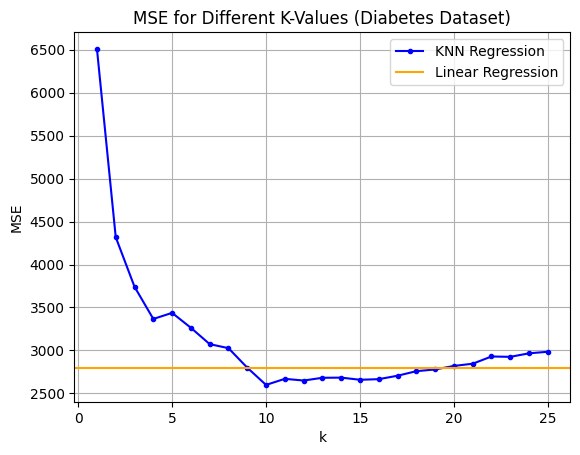

In [16]:
#### Exercise 4: k-NN regression ####
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

# Do it for different values of k
ks = np.arange(1, 26)
mses = np.zeros_like(ks)

for i, k in enumerate(ks):
    y_pred_k = nearest_neighbors(X_test, X_train, y_train, k, "regression")
    mse_k = mean_squared_error(y_test, y_pred_k)
    mses[i] = mse_k

# Plot the mean squared errors
plt.figure()
plt.plot(ks, mses, marker=".", label="KNN Regression", color="blue")
plt.axhline(mse_ex1, label="Linear Regression", color="orange")
plt.legend(loc="best")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for Different K-Values (Diabetes Dataset)")
plt.grid(True)
plt.show()


The plot shows that for k < 9 and k > 20 the linear regression outperforms the KNN algorithm. Though, for values of k between 9 and 20 the KNN algorithm seems to be the better option.

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>



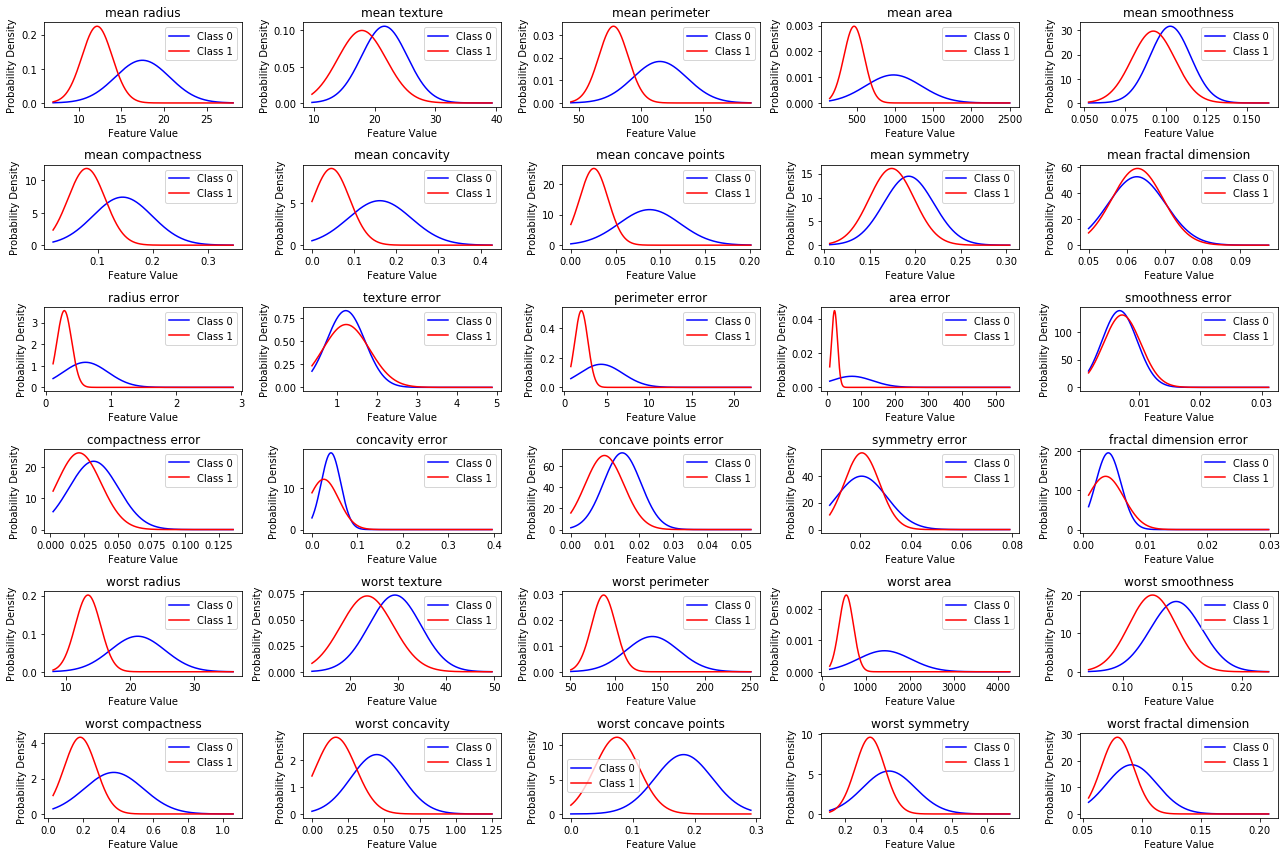

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from scipy.stats import norm

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Separate the dataset into two classes
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Compute mean and variance for each feature conditioned on each class
means_class0 = X_class0.mean(axis=0)
variances_class0 = X_class0.var(axis=0)

means_class1 = X_class1.mean(axis=0)
variances_class1 = X_class1.var(axis=0)

# Create plots for each feature
plt.figure(figsize=(18, 12))

for i in range(X.shape[1]):
    plt.subplot(6, 5, i + 1)  # 6x5 grid for 30 features
    x = np.linspace(X[:, i].min(), X[:, i].max(), 1000)
    pdf_class0 = norm.pdf(x, means_class0[i], np.sqrt(variances_class0[i]))
    pdf_class1 = norm.pdf(x, means_class1[i], np.sqrt(variances_class1[i]))
    
    plt.plot(x, pdf_class0, label='Class 0', color='blue')
    plt.plot(x, pdf_class1, label='Class 1', color='red')
    plt.title(feature_names[i])
    plt.xlabel('Feature Value')
    plt.ylabel('Probability Density')
    plt.legend()

plt.tight_layout()
plt.show()
